### Introduction

#### iFood is a Brazilian online platform for
#### ordering and delivering food. The purpose of this
#### project is to determine the factors which would affect spending.

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### **Import the data** 

In [3]:
dfr = pd.read_csv(r"C:\data\ifood_df.csv")

### Overview and basic data cleaning

#### Get the first few rows of the dataframe to look at its structure

In [3]:
dfr.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


#### Check for any missing values

In [4]:
dfr.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

#### Get data type for each column

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#### The data type for the column 'income' to 'int' is changed for an easier analysis

In [7]:
dfr.Income=dfr.Income.astype(int)

dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int32
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

#### Check for duplicated values

In [22]:
duplicates = dfr[dfr.duplicated(keep=False)].sort_values(by=['Income'])

duplicates

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
28,10979,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
1118,10979,0,0,34,8,4,10,2,2,4,...,0,0,0,0,0,1,0,26,22,0
246,15287,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1183,15287,1,0,60,1,2,8,4,3,13,...,0,0,0,0,1,0,0,18,5,1
1087,15315,0,0,27,7,4,13,15,8,17,...,0,0,1,0,0,0,0,47,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,87771,0,1,61,1492,38,287,50,57,33,...,1,0,0,0,1,0,0,1924,1891,4
1280,94384,0,0,62,1111,24,790,160,45,172,...,1,0,0,0,1,0,0,2130,1958,3
923,94384,0,0,62,1111,24,790,160,45,172,...,1,0,0,0,1,0,0,2130,1958,3
1093,98777,0,0,23,1000,19,711,125,115,38,...,0,0,0,0,0,1,0,1970,1932,1


#### Remove any duplicates

In [23]:
dfr.drop_duplicates(inplace=True)

In [24]:
dfr.duplicated().any()

False

#### Check for any null values

In [25]:
dfr.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

#### The dataframe shows the columns related to "marital status" are displayed horizontally, 
#### with 1s and 0s as binary representation: 
#### 1- present 
#### 0- absent


#### For an easier analysis,
#### The dataframe will be transformed by condensing the 5 columns related to "marital status" into 1 column.
#### First, a list: 'marital_columns' is created. idxmax(axis=1)finds the column name that has the highest value, in this case, 1, in each row. The column name is split and the second part of the split string is extracted. Categorize the types of marital status.

#### For example,the marital status for customer 1. The above code will go through each column in 'marital_columns' for customer 1. If the 'marital_Divorced' column for customer 1 is '0', the next column(s) will be checked until '1' is found. Then, the column name where '1' is found will be used. The column name will be split into two with first part as 'marital' and the second part as the marital status, like 'Married'. The second part will be extracted and categorized. If the status is either 'Divorced', 'Single' or 'Widow', it will be categorized as 'Alone', otherwise it will be categorized as 'Together'.

In [4]:
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'] 



dfr['marital_Status'] = dfr[marital_columns].idxmax(axis=1).str.split('_').str[1]



dfr['marital_Situation'] = np.where(dfr['marital_Status'].isin(['Divorced', 'Single', 'Widow']), 'Alone', 'Together')


dfr


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,marital_Situation
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,Alone
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,Alone
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,Together
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1,0,0,1094,847,0,Married,Together
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,1,436,428,1,Together,Together
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1217,1193,1,Divorced,Alone
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,782,721,0,Together,Together


#### The above steps are repeated for 'education'.

In [5]:
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master','education_PhD']

dfr['education_level']= dfr[education_columns].idxmax(axis=1).str.split('_').str[1]

dfr

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,marital_Situation,education_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,Single,Alone,Graduation
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,Single,Alone,Graduation
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,Together,Together,Graduation
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,Together,Together,Graduation
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,Married,Together,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,1,0,0,1094,847,0,Married,Together,Graduation
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,1,436,428,1,Together,Together,PhD
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,1,0,0,1217,1193,1,Divorced,Alone,Graduation
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,1,0,782,721,0,Together,Together,Master


#### A new column, 'Number of dependents' is created to condense 'Kidhome' and 'Teenhome'.

In [6]:
dfr['Number_of_dependents']= dfr['Kidhome'] + dfr['Teenhome']

dfr

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,marital_Situation,education_level,Number_of_dependents
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,Single,Alone,Graduation,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,Single,Alone,Graduation,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,Together,Together,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,Together,Together,Graduation,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,Married,Together,PhD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,1,0,0,1094,847,0,Married,Together,Graduation,1
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,1,436,428,1,Together,Together,PhD,3
2202,56981.0,0,0,91,908,48,217,32,12,24,...,1,0,0,1217,1193,1,Divorced,Alone,Graduation,0
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,1,0,782,721,0,Together,Together,Master,1


#### Customer demographics

In [14]:
data1=dfr['marital_Situation']

data2=dfr['education_level']

marital_situation_cnt= pd.value_counts(np.array(data1))

education_level_cnt= pd.value_counts(np.array(data2))


print('Marital situation count=\n',marital_situation_cnt)
print('Marital situation count=\n',education_level_cnt)

Marital situation count=
 Together    1422
Alone        783
Name: count, dtype: int64
Marital situation count=
 Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64


In [19]:
selected_columns = ['Age', 'Income', 'MntTotal','Number_of_dependents']
selected_data = dfr[selected_columns]

selected_data.describe()

,Age,Income,MntTotal,Number_of_dependents
count,2205.000000,2205.000000,2205.000000,2205.000000
mean,51.095692,51622.094785,562.764626,0.948753
std,11.705801,20713.063826,575.936911,0.749231
min,24.000000,1730.000000,4.000000,0.000000
25%,43.000000,35196.000000,56.000000,0.000000
50%,50.000000,51287.000000,343.000000,1.000000
75%,61.000000,68281.000000,964.000000,1.000000
max,80.000000,113734.000000,2491.000000,3.000000


##### Table 1: Statistical data for age, income, spending and number of dependents.

#### From the count and Table 1, the majority of customers
#### 1. Are married or living with another person 
#### 2. Graduated from college 
#### 3. Are young to middle-aged adults, with one child

#### The average yearly income is BRL51,622 with average spending approximately 1% of the income.   



### Data Visualization

#### Boxplots are used for visualization of age, income, spending and the number of dependents.

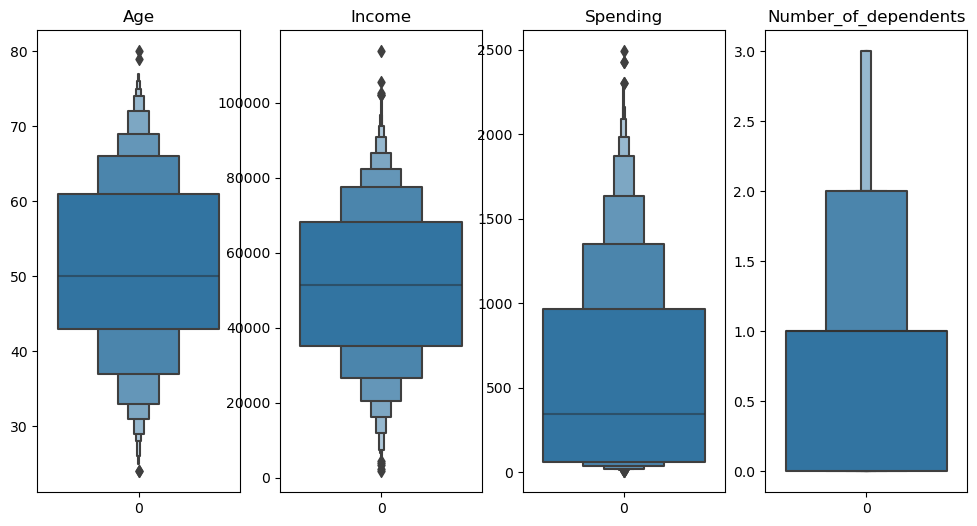

In [20]:
fig, axes = plt.subplots(1,4, figsize=(12,6))

sns.boxenplot(data=dfr.Age.round(2), ax=axes[0])
axes[0].set_title('Age')


sns.boxenplot(data=dfr.Income.round(2), ax=axes[1])
axes[1].set_title('Income')

sns.boxenplot(data=dfr.MntTotal.round(2), ax=axes[2])
axes[2].set_title('Spending')

sns.boxenplot(data=dfr.Number_of_dependents, ax=axes[3])
axes[3].set_title('Number_of_dependents')


plt.show()

##### Figure 1: Boxplots for age, income, spending and the number of dependents.

#### A correlation matrix is drawn to visualize the relationship between age, income, spending and the number of dependents.

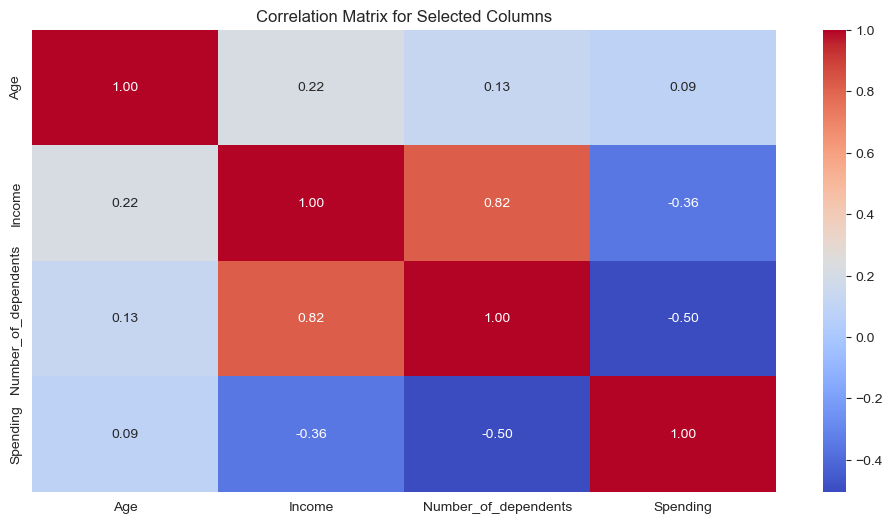

In [42]:
selected_columns= ['Age', 'Income', 'MntTotal', 'Number_of_dependents']
corr_mat_data=dfr[selected_columns]
correlation_matrix= corr_mat_data.corr()

correlation_matrix.columns = ['Age', 'Income','Number_of_dependents', 'Spending']
correlation_matrix.index = ['Age', 'Income','Number_of_dependents',  'Spending']

plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

##### Figure 2: Correlation matrix for age, income, number of dependents and spending.

#### From the correlation matrix income and spending has the highest correlation; 
#### number of dependents and spending has the lowest correlation.
#### We will do a hypothesis testing on this.

### Hypothesis testing for income vs amount spent

#### First, variables are defined.
#### A constant is added to represent the intercept of the model.
#### The OLS model is defined.
#### The model is fitted to the data.
#### The p-value is used to compare with α, where α =0.05.
#### The validity of the null hypothesis is evaluated based on the comparison.

In [66]:
x= dfr['Income']
y = dfr['MntTotal']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

p_value = model.pvalues['Income']

alpha = 0.05

print("p-value:", p_value)


if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between income and amount spent.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between income and amount spent.")

p-value: 0.0
Reject the null hypothesis: There is a significant relationship between income and amount spent.


#### In other words, the correlation between income and spending is not by random chance, 
#### suggesting a true association between the variables.

### Hypothesis testing for income and spending vs number of dependents

#### From the correlation matrix, 
#### spending and number of dependents r=-0.50; 
#### income and number of dependents r=-0.36.
#### It is hypothesized that the above two relationships will have a positive correlation,
#### the results are inconsistent with our hypothesis. 
#### Hence a further analysis is done on the relationship.

#### Histograms are plotted to visualize the distributions.

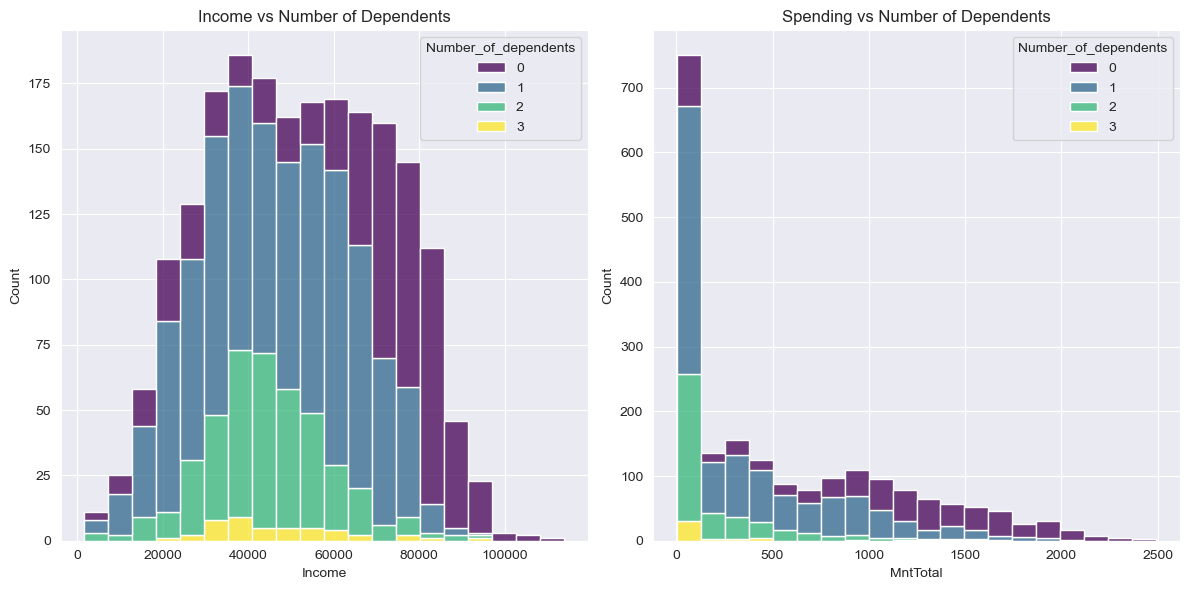

In [47]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data=dfr, x='Income', hue='Number_of_dependents', palette='viridis', bins=20, multiple='stack')
plt.title('Income vs Number of Dependents')

plt.subplot(1,2,2)
sns.histplot(data=dfr, x='MntTotal', hue='Number_of_dependents', palette='viridis', bins=20, multiple='stack')
plt.title('Spending vs Number of Dependents')




plt.tight_layout()
plt.show()

##### Figure 3: Histograms for income and spending.

#### From the plots,
#### Income vs number of dependents looks like Gaussian distribution;
#### Spending vs number of dependents does not look like Gaussian distribution.

#### Hence, Shapiro-Wilk test is used to determine the validity of the Gaussian distribution.

### Shapiro-Wilk test

#### H0: Sample looks Gaussian.
#### HA: Sample does not look Gaussian.

In [29]:
from scipy.stats import shapiro

a=df['Income']
b=df['MntTotal']
c=df['num_dependents']


statistic_a, p_value_a=shapiro(a)
statistic_b, p_value_b=shapiro(b)
statistic_c, p_value_c=shapiro(c)

print("Income:", statistic_a, p_value_a)
print("Spending:", statistic_b, p_value_b)
print("Number of children:", statistic_c, p_value_c)

alpha=0.05
if p_value_a > alpha:
    print("Accept H0:Sample looks Gaussian.")
else:
    print("Reject H0:Sample does not look Gaussian")
    
if p_value_b > alpha:
    print("Accept H0:Sample looks Gaussian.")
else:
    print("Reject H0:Sample does not look Gaussian")
    
if p_value_c > alpha:
    print("Accept H0:Sample looks Gaussian.")
else:
    print("Reject H0:Sample does not look Gaussian")

Income: 0.9855793118476868 2.094493063145228e-13
Spending: 0.8576340675354004 2.2551208290256427e-39
Number of children: 0.8289992809295654 4.390268088729652e-42
Reject H0:Sample does not look Gaussian
Reject H0:Sample does not look Gaussian
Reject H0:Sample does not look Gaussian


#### All 3 variables does not have a Gaussian distribution, non-parametric statistical tests are used.

### Hypothesis testing with Spearman correlation

#### H0: There is no monotonic decreasing relationship between income and number of dependents.
#### HA: There is a monotonic decreasing relationship between income and number of dependents.
#### *monotonic relationship: when one variable increases, the other decreases.

In [91]:
income = df['Income']
number_of_dependents = df['num_dependents']


correlation, p_value = stats.spearmanr(income, number_of_dependents)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a monotonic decreasing relationship between income and number of dependents.")
else:
    print("Accept the null hypothesis: There is no monotonic decreasing relationship between income and number of dependents.")
    

Reject the null hypothesis: There is a monotonic decreasing relationship.


#### In this case, as income increases, the number of dependents tend to decrease.

#### H0: There is no monotonic decreasing relationship between spending and number of dependents.
#### HA: There is a monotonic decreasing relationship between spending and number of dependents.


In [93]:
spending = df['MntTotal']
number_of_dependents = df['num_dependents']


correlation, p_value = stats.spearmanr(spending, number_of_dependents)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a monotonic decreasing relationship between spending and number of dependents")
else:
    print("Accept the null hypothesis: There is no monotonic decreasing relationship between spending and number of dependents")
    

Reject the null hypothesis: There is a monotonic decreasing relationship.


#### For this scenario, as the amount of spending increases, the number of dependents tend to decrease.

#### It is predicted that web visits and web purchases have a positive linear relationship.
#### The accuracy of this hypothesis is tested.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_10124\554235595.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


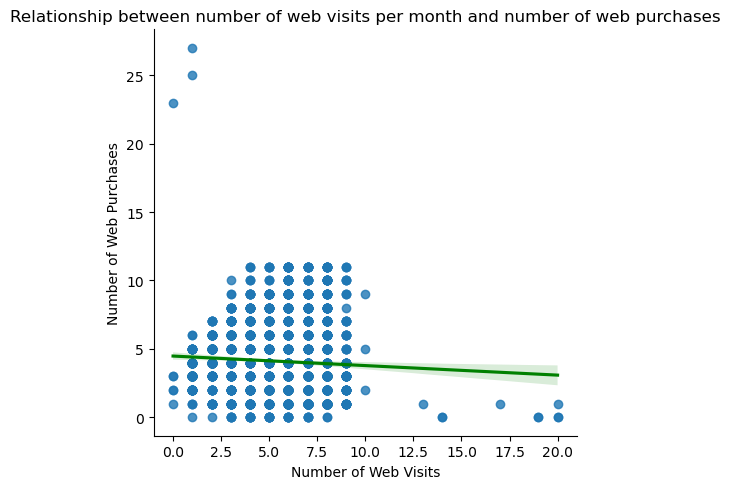

In [28]:
sns.lmplot(x='NumWebVisitsMonth',y='NumWebPurchases', data=dfr, line_kws={'color': 'green'})
plt.title('Relationship between number of web visits per month and number of web purchases')
plt.xlabel('Number of Web Visits')  
plt.ylabel('Number of Web Purchases')  
plt.tight_layout()
plt.show() 

##### Figure 4: Scatter plot between the number of web purchases and the number of web visits.


#### The figure shows a negative correlation between web visits and web purchases.

#### Mann-Whitney U test is done to evaluate the difference between web visits and web purchases.

### Mann-Whitney U test

#### H0: There is no significant difference between web purchases and web visits.
#### HA: There is a significant difference between web purchases and web visits.

In [37]:
from scipy.stats import mannwhitneyu

web_purchases = df['NumWebPurchases'] 
web_visits = df['NumWebVisitsMonth'] 

u_statistic, p_value = mannwhitneyu(web_purchases, web_visits)

u_statistic,  p_value

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between web purchases and web visits.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between web purchases and web visits.")

Reject the null hypothesis. There is a significant difference between web purchases and web visits.


#### In other words, the observation is unlikely due to random chance. 
#### It is likely there is a meaningful difference between them. In this case, 
#### the behavior of users who make web purchases might be significantly differrent 
#### from those who browse the web without making any purchases.

#### We explore the significance of this linear relationship further using OLS regression.

### OLS Regression

#### First, the variables are defined.

#### The linear regression equation is y= b0+ b1*x1.
#### As shown above, there is no x0, and if there is, it would be 1,
#### so we need to add a constant for computational purposes.

#### Afterthat, we need to add another variable called 'results',
#### which contains the ordinary least squares regression(OLS).

#### Print the summary of the results.

In [38]:
import statsmodels.api as sm

y= df['NumWebPurchases'] 
x1= df['NumWebVisitsMonth'] 

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NumWebPurchases   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.429
Date:                Mon, 04 Mar 2024   Prob (F-statistic):             0.0113
Time:                        14:11:27   Log-Likelihood:                -4911.0
No. Observations:                2021   AIC:                             9826.
Df Residuals:                    2019   BIC:                             9837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4567      0.148     30.131      0.000       4.167       4.747
NumWebVisitsMonth    -0.0639      0.025     -2.535      0.011      -0.113      -0.014
==============================================================================
Omnibus:                      535.663   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2017.977
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                       7.199   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The F-statistics is used to assess the significance of the regression model.
#### F-stats coefficient:β

In [39]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one β is not equal to zero.")
else:
    print("Accept the null hypothesis: all βs are zero.")

Reject the null hypothesis: At least one β is not equal to zero.


#### In other words, there are other factors affecting web purchases.

#### It is predicted that the number of deals purchased 
#### and number of dependents have a positive linear relationship.
#### The accuracy of this hypothesis is tested.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_10124\3140619647.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


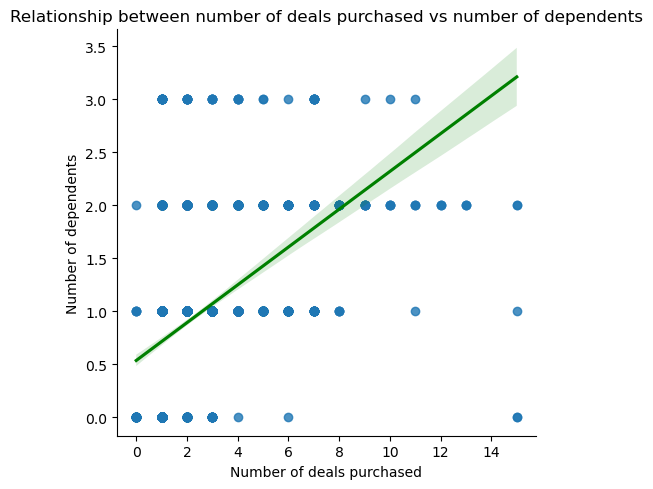

In [27]:
sns.lmplot(x='NumDealsPurchases', y='Number_of_dependents', data=dfr, line_kws={'color': 'green'})
plt.title('Relationship between number of deals purchased vs number of dependents')
plt.xlabel('Number of deals purchased')
plt.ylabel('Number of dependents')
plt.tight_layout()
plt.show() 

##### Figure 5: Scatter plot between the number of deals purchased and number of dependents.

#### Figure 5 shows a positive correlation between number of deals purchased and number of dependents.

#### The significance of the relationship is further explored.

#### H0: There is no significant difference between deals purchased and number of dependents.
#### HA: There is a significant difference between deals purchased and number of dependents.


In [41]:
from scipy.stats import mannwhitneyu

deals_purchased = df['NumDealsPurchases'] 
number_of_dependents = df['num_dependents'] 

u_statistic, p_value = mannwhitneyu(deals_purchased, number_of_dependents)

u_statistic,  p_value

alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between deals purchased and number of dependents.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between deals purchased and number of dependents.")

Reject the null hypothesis. There is a significant difference between deals purchased and number of dependents.


#### In other words, it is likely that the number of children has an effect on the number of deals purchased. 

In [43]:
y=df['num_dependents']
x2=df['NumDealsPurchases']

x = sm.add_constant(x2)

results = sm.OLS(y,x).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         num_dependents   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     479.1
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.77e-95
Time:                        14:12:04   Log-Likelihood:                -2060.1
No. Observations:                2021   AIC:                             4124.
Df Residuals:                    2019   BIC:                             4135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5507      0.024     23.264      0.000       0.504       0.597
NumDealsPurchases     0.1726      0.008     21.889      0.000       0.157       0.188
==============================================================================
Omnibus:                      128.210   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.938
Skew:                           0.589   Prob(JB):                     4.15e-36
Kurtosis:                       3.739   Cond. No.                         5.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one β is not equal to zero.")
else:
    print("Accept the null hypothesis: all βs are zero.")

Reject the null hypothesis: At least one β is not equal to zero.


#### In this case, the number of children has an impact on the number of deals purchased.

#### In conclusion, the factors that affect spending are income and number of dependents:
#### Customers with higher income tend to spend more;
#### more deals will be purchased with higher number of dependents.
#### Because web visits and web purchases are negatively correlated,
#### more web visits don't increase web purchases.